In [ ]:
# 多变量线性回归

## 再看房价预测  
房价除了和面积相关以外，还可能与以下因素有关：
* 房间的个数
* 楼层
* 房屋的年龄
* 离市中心的距离
* ......

多个特征构成了一个含有多个变量的模型，模型中的特征为$(x_1,x_2,\dots,x_n)$
这种含有多个特征的线性回归，称为`多变量线性回归`或`多元线性回归`。


## 多元线性回归模型

一元线性回归只有一个特征x，而多元线性回归可以有多个特征$x_1,x_2,…,x_n$。

假设函数如下：

$$h_\theta(x)=\theta^Tx=\theta_0x_0+\theta_1x_1+\ldots+\theta_nx_n$$

参数 (Parameters)：

$$\theta_0, \theta_1, \ldots, \theta_n$$

代价函数 (Cost function)：

$$J(\theta_0, \theta_1, \ldots, \theta_n)=\frac{1}{2m}\sum\limits_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$$

目标 (Goal)：
$$\min_\theta J(\theta)$$

## 特征缩放
问题：多个特征中，有些特征的值非常大，有些特征非常小，这样会导致收敛会非常慢。  
例如：
* “面积” 特征：比如说0-2000
* “房间数”特征：0-5

![特征缩放](img/scaling.png)


### 动机：
如果不同特征之间的数值量级差别太大，那么梯度下降的速度非常慢，为了加快算法的收敛速度，将各个特征划归到统一数量级，一般是[0, 1]或者[-1, 1]之间。
### 解决办法：
特征缩放(Feature Scaling)
一般地，做如下特征缩放：
$$x_j=\frac{x_j-\mu_j}{s_j}$$
其中 $\mu_j$表示第$j$个特征的均值, $s_j$表示第$j$个特征的范围$(max - min)$或者标准差(standard deviation)。

例如：对面积和房间数缩放后

![特征缩放](img/scaled.png)

## 学习速率

### 学习速率 α的选择
合理的选择学习速率，保证$J(θ)$的值在每一次迭代后都是下降的，如何选择？

如果$J(θ)$随迭代次数单调递增或者$J(θ)$随迭代次数成波浪形(例如: \/\/\/\/\/\/), 这时候应该考虑选择较小的$\alpha$

为了正确的选择$\alpha$，尝试序列 0.001, 0.01, 0.1, 1等

总之，
 * $\alpha$太小，收敛很慢，需要更多的迭代次数
 * $\alpha$太大，收敛快，但不是每次迭代代价函数会减少，有可能不收敛

![学习速率](img/learningrate.png)

## 特征与多项式回归
线性回归并不适用于所有的数据，有时候，需要曲线来适应数据，比如：二次方模型
$$h_\theta(x)=\theta_0+\theta_1x_1+\theta_2x_2^2$$
或三次方模型
$$h_\theta(x)=\theta_0+\theta_1x_1+\theta_2x_2^2+\theta_3x_3^3$$
例如：
![多项式回归](img/poly.png)

例如：  
假设函数：
  $$h_\theta(x)=\theta_0+\theta_1*size + \theta_2 * {size}^2$$
转换函数：
    $$x_1=size$$,$$x_2={size}^2$$

得到，  
    $$h_\theta(x)=\theta_0+\theta_1*x_1+ \theta_2*x_2$$

最后，变成线性回归，利用线性回归梯度下降求解。

注意：多项式回归模型，运行梯度下降，特征缩放是很有必要的


## 梯度下降算法
* 批量梯度下降(Batch gradient descent，BGD)：每次使用所有的训练样本更新模型参数进行迭代。  
    * 优点：线性回归可全局最优解、易于并行实现；总体迭代次数不多  
    * 缺点：当样本数目很多时候，训练过程会很慢，每次迭代需要耗费大量时间  
* 随机梯度下降(Stochastic gradient descent,SGD)：随机梯度下降算法每次从训练集中随机选择一个样本来进行迭代，每次一个样本，每次学习非常快，可以进行在线更新。  
    * 优点：训练速度快
    * 缺点：准确度下降，并不是全局最优；不易于并行实现
* 小批量梯度下降(Mini-batch Gradient Descent,MBGD):综合了批量梯度下降与随机梯度下降，在每次更新速度与更新次数中间取得一个平衡，其每次更新从训练集中随机选择batch_size（batch_size<m）个样本进行学习。
    * 优点：
    （1）每次在一个batch_size上优化参数并不会比单个数据慢太多。  
    （2）减小收敛所需要的迭代次数，同时可使收敛到的结果接近批量梯度下降的效果。  
    （3）可实现并行化。
    * 缺点：batch_size的不当选择可能会带来一些问题。  


总之，MBGD克服了BGD和SGD的两者的缺点，又兼顾了两者的优点。

## 从一个简单的例子做起

## 创建数据集
这里我们使用一个数据集来尽量简单地解释清楚，真实的线性回归模型是什么样的。具体来说，我们使用如下方法来生成数据；`X[i][0]=1`,随机数值 `X[i][1]`，其相应的标注为 `y[i]`：

`y[i] = 4.2 * X[i][0] + 2 * X[i][1] - 3.4 * X[i][2] + noise`

使用数学符号表示：

$$y = X \cdot \theta  + \eta, \quad \text{for } \eta \sim \mathcal{N}(0,\sigma^2)$$

这里噪音服从均值0和标准差为0.01的正态分布。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#特征数
num_inputs = 2
#数据集大小
num_examples = 1000
#产生数据的真实参数
true_theta = np.array([[4.2, 2, -3.4]])
#rand函数根据给定维度生成[0,1)之间的数据
X = np.random.randn(num_examples, num_inputs)
#在第一列插入常数列
X = np.insert(X, 0, values=np.ones(num_examples), axis=1)

y = np.dot(X, true_theta.T)
y += .01 * np.random.randn(num_examples, 1)

In [3]:
print(X[0],y[0])

[ 1.         -0.30535749 -0.48851875] [5.24021507]


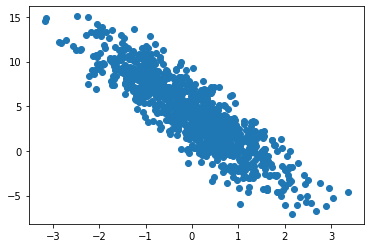

In [4]:
#绘制散列图
plt.scatter(X[:, 2],y)
plt.show()

## 定义模型

线性模型就是将输入和模型的参数（$\theta$）相乘：

$$\boldsymbol{h_\theta(X)} = X \boldsymbol{\theta}$$  

In [5]:
def net(X, theta):
    return np.dot(X, theta.T)

## 定义损失函数

我们使用常见的平方误差来衡量预测目标和真实目标之间的差距。

$$\frac{1}{2m}\sum_{i=1}^m (h_\theta(x_i)-y_i)^2.$$

In [6]:
def computeCost(h, y):
    cost = np.power((h - y), 2)
    return np.sum(cost)/(2*len(X))

## 梯度下降

虽然线性回归有显式解，但绝大部分模型并没有。所以我们这里通过随机梯度下降来求解。每一步，我们将模型参数沿着梯度的反方向走特定距离，这个距离一般叫**学习率（learning rate）** $\alpha$。

In [7]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.zeros(theta.shape)
    cost = np.zeros(iters)
    paraNum = int(np.ravel(theta).shape[0])
    
    #while true：
    for i in range(iters):
        error = np.dot(X, theta.T) - y
        for j in range(paraNum):
            term = error * X[:,j].reshape(error.shape)
            temp[0, j] = theta[0, j] - ((alpha / len(X))) * np.sum(term)
        theta = temp
        h = net(X, theta)
        loss = computeCost(h, y)
        costJ.append(loss)
        if (i + 1) % 100 == 0:
            print("Epoch %s. Moving loss: %s. theta0:%s, theta1:%s, theta2:%s"  
                  % (i, loss,theta[0][0],theta[0][1], theta[0][2]))
            plot(costJ, X, theta)
    return theta

## 初始化模型

下面我们随机初始化模型参数

In [8]:
theta = np.array([[0, 0, 0]])  #随机数

## 训练

现在我们可以开始训练了。训练通常需要迭代数据数次，在这里使用`iters`表示迭代总次数；一次迭代中，我们读所有的训练点，计算梯度并更新模型参数（批量梯度下降）。

In [9]:
# 模型函数
def real_fn(X):
    return 4.2 * X[:, 0] + 2 * X[:, 1] - 3.4 * X[:, 2]

# 绘制损失随训练次数降低的折线图，以及预测值和真实值的散点图
def plot(losses, X, theta, sample_size=100):
    xs = list(range(len(losses)))
    f, (fg1, fg2) = plt.subplots(1, 2)
    fg1.set_title('Loss during training')
    fg1.plot(xs, losses, '-r')
    fg2.set_title('Estimated vs real function')
    fg2.plot(X[:sample_size, 1],
             net(X[:sample_size, :], theta), 'or', label='Estimated')
    fg2.plot(X[:sample_size, 1],
             real_fn(X[:sample_size, :]), '*g', label='Real')
    fg2.legend()
    plt.show()

Epoch 99. Moving loss: 2.1704057888862924. theta0:2.6515162579879124, theta1:1.2931244590701045, theta2:-2.2376910110976964


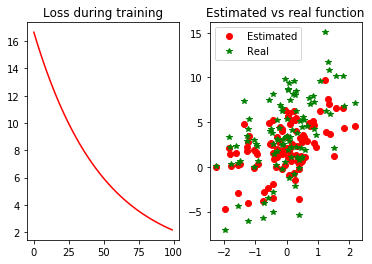

Epoch 199. Moving loss: 0.27852204711202955. theta0:3.62965799893692, theta1:1.7498252581616947, theta2:-3.0023217040478083


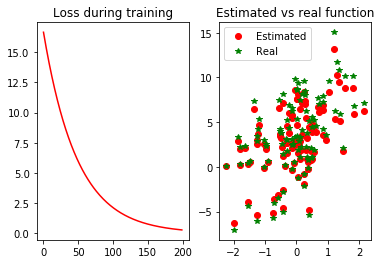

Epoch 299. Moving loss: 0.03594304141927623. theta0:3.9902515081730012, theta1:1.911352614028789, theta2:-3.263752997301743


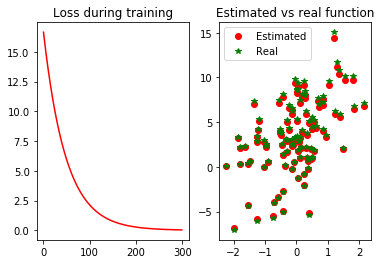

Epoch 399. Moving loss: 0.004696997821028722. theta0:4.123103549344697, theta1:1.9685632916778544, theta2:-3.3531932961026705


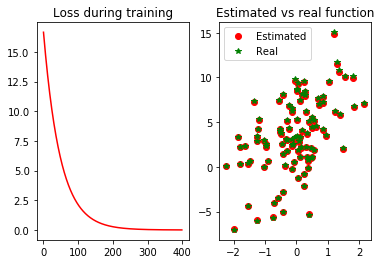

Epoch 499. Moving loss: 0.0006552012691582203. theta0:4.172022353073212, theta1:1.988854920004729, theta2:-3.3838125737589317


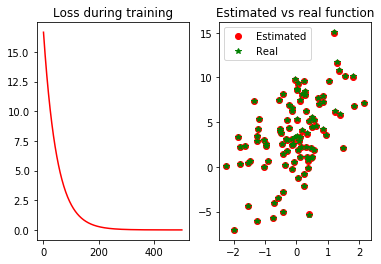

In [10]:
#初始化模型，并进行训练
alpha = 0.01
theta = np.array([[0, 0, 0]])
iters = 500
costJ = []
theta = gradientDescent(X, y, theta, alpha, iters)

## 绘制训练误差图

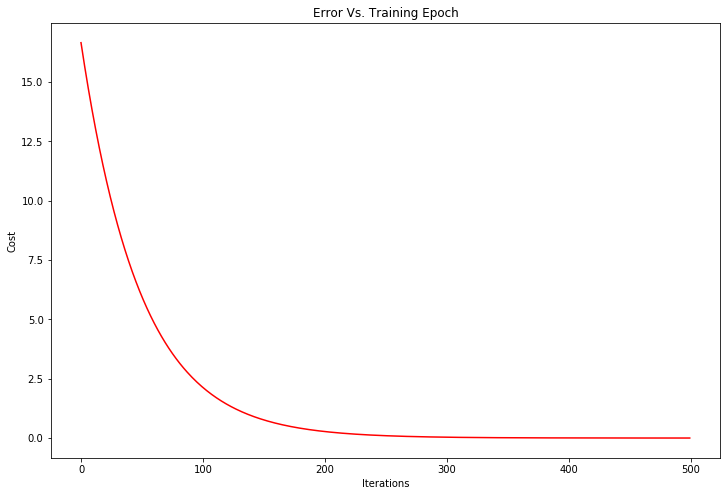

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), costJ, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error Vs. Training Epoch')
plt.show()

In [12]:
theta

array([[ 4.17202235,  1.98885492, -3.38381257]])

In [13]:
true_theta

array([[ 4.2,  2. , -3.4]])

# 利用小批量梯度下降法进行求解

## 数据读取

当我们开始训练线性回归的时候，我们需要不断读取数据块。这里我们定义一个函数它每次返回`batch_size`个随机的样本和对应的目标。我们通过python的`yield`来构造一个迭代器。

In [23]:
import random
batch_size = 10
def data_iter():
    # 产生一个随机索引
    idx = list(range(num_examples))
    #random.shuffle函数将序列的所有元素随机排序
    random.shuffle(idx)
    for i in range(0, num_examples, batch_size):
        j = idx[i:min(i+batch_size,num_examples)]
        yield X[j],y[j]

In [24]:
#下面代码读取第一个随机数据块
for data, label in data_iter():
    print(data, label)
    break

[[ 1.         -0.80812474  1.31973454]
 [ 1.         -2.96757087  0.26424622]
 [ 1.         -0.31861434  0.3156795 ]
 [ 1.         -0.19543851 -0.04908151]
 [ 1.         -1.56673644 -0.23441305]
 [ 1.         -1.55202508 -0.4157842 ]
 [ 1.         -1.4956491  -0.48735907]
 [ 1.         -0.88520086 -0.4372886 ]
 [ 1.          0.3634647   1.87074185]
 [ 1.         -0.65933191 -1.0107497 ]] [[-1.91119276]
 [-2.63881693]
 [ 2.47499733]
 [ 3.96607799]
 [ 1.85866798]
 [ 2.50083374]
 [ 2.87055488]
 [ 3.92329888]
 [-1.42905033]
 [ 6.32259132]]


## 定义模型

In [25]:
def net(X, theta):
    return np.dot(X, theta.T)

## 损失函数

使用常见的平方误差来衡量预测目标和真实目标之间的差距

In [26]:
def square_loss(yhat, y):
    # 注意这里我们把y变形成yhat的形状来避免矩阵形状的自动转换
    return (yhat - y.reshape(yhat.shape)) ** 2

## 优化

虽然线性回归有显式解，但绝大部分模型并没有。所以我们这里通过随机梯度下降来求解。每一步，我们将模型参数沿着梯度的反方向走特定距离，这个距离一般叫**学习率（learning rate）** $\alpha$。

In [27]:
def SGD(params, grad, alpha):
    params = params - alpha * grad
    return params

## 初始化模型参数

下面我们随机初始化模型参数

In [28]:
theta = np.random.randn(1, num_inputs)
b = np.zeros(1).reshape(1,1)
#列合并
theta = np.column_stack((b, theta))

## 训练

现在我们可以开始训练了。训练通常需要迭代数据数次，在这里使用`epochs`表示迭代总次数；一次迭代中，我们每次随机读取固定数个数据点，计算梯度并更新模型参数。

In [29]:
# 模型函数
def real_fn(X):
    return 4.2 * X[:, 0] + 2 * X[:, 1] - 3.4 * X[:, 2]
# 绘制损失随训练次数降低的折线图，以及预测值和真实值的散点图
def plot(losses, X, theta, sample_size=100):
    xs = list(range(len(losses)))
    f, (fg1, fg2) = plt.subplots(1, 2)
    fg1.set_title('Loss during training')
    fg1.plot(xs, losses, '-r')
    fg2.set_title('Estimated vs real function')
    fg2.plot(X[:sample_size, 1],
             net(X[:sample_size, :], theta), 'or', label='Estimated')
    fg2.plot(X[:sample_size, 1],
             real_fn(X[:sample_size, :]), '*g', label='Real')
    fg2.legend()
    plt.show()

Epoch 0, batch 99. Moving avg of loss: 0.9607882852054695. Average loss: 1.543420


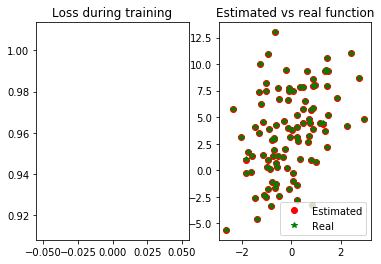

Epoch 1, batch 199. Moving avg of loss: 0.25641904910193464. Average loss: 0.000099


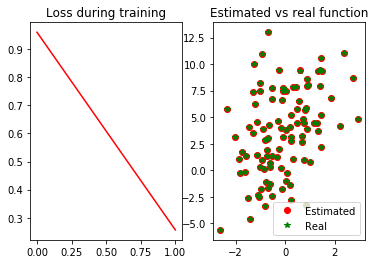

Epoch 2, batch 299. Moving avg of loss: 0.08545307424034848. Average loss: 0.000100


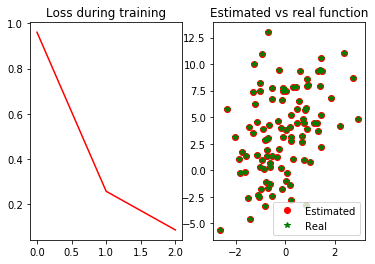

Epoch 3, batch 399. Moving avg of loss: 0.030342469500389796. Average loss: 0.000100


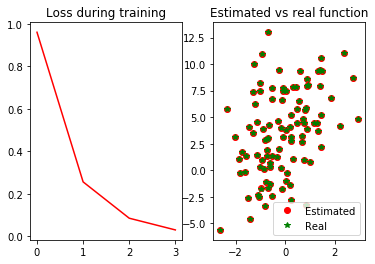

Epoch 4, batch 499. Moving avg of loss: 0.01104207344366947. Average loss: 0.000100


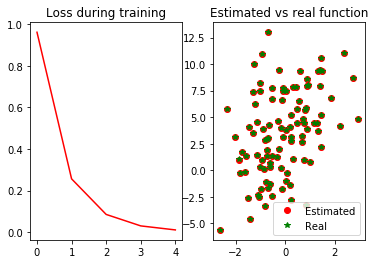

In [30]:
#迭代轮次
epochs = 5
#学习速率
learning_rate = 0.01
niter = 0
losses = []
moving_loss = 0
smoothing_constant = .01
for e in range(epochs): # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    total_loss = 0
    for data, label in data_iter():
        #模型输出
        output = net(data, theta)
        #误差
        error = output - label
        #梯度
        grad = np.sum(error * data, axis = 0)
        #当前损失
        loss = error ** 2
        #更新参数
        theta = SGD(theta, grad, learning_rate)
        #总的损失
        total_loss += np.sum(loss)

        # 记录每读取一个数据点后，损失的移动平均值的变化；
        niter +=1
        # 计算当前损失
        curr_loss = np.mean(loss)
        # 计算移动平均损失，指数平滑方法
        moving_loss = (1 - smoothing_constant) * moving_loss + (smoothing_constant) * curr_loss

        # 计算估计损失
        est_loss = moving_loss/(1-(1-smoothing_constant)**niter)
        #输出迭代信息
        if (niter + 1) % 100 == 0:
             # 保存估计损失
            losses.append(est_loss)
            print("Epoch %s, batch %s. Moving avg of loss: %s. Average loss: %f" % (e, niter, est_loss, total_loss/num_examples))
            plot(losses, X, theta)

In [31]:
theta

array([[ 4.19997675,  2.00007282, -3.39945613]])

In [32]:
true_theta

array([[ 4.2,  2. , -3.4]])

### 示例二：房价预测
数据包括房子的面积、卧室的个数等特征。通过多元线性回归来进行房价预测

#### 读取数据

In [2]:
data = pd.read_csv('data/ex1data2.txt', header = None,
                   names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#### 数据归一化

In [3]:
data = (data-data.mean())/data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


#### 梯度下降求解

利用批量梯度下降进行求解，gradientDescent实现放在包utils里面。

In [10]:
import utils as utils

#### 训练模型

In [5]:
data.insert(0,'Ones',1)
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:,cols-1:cols]

X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))

In [11]:
alpha = 0.05
iters = 1000

In [12]:
g, cost = utils.gradientDescent(X, y, theta, alpha, iters)
utils.square_loss(ut.h(X,g), y)

0.13068648053904203

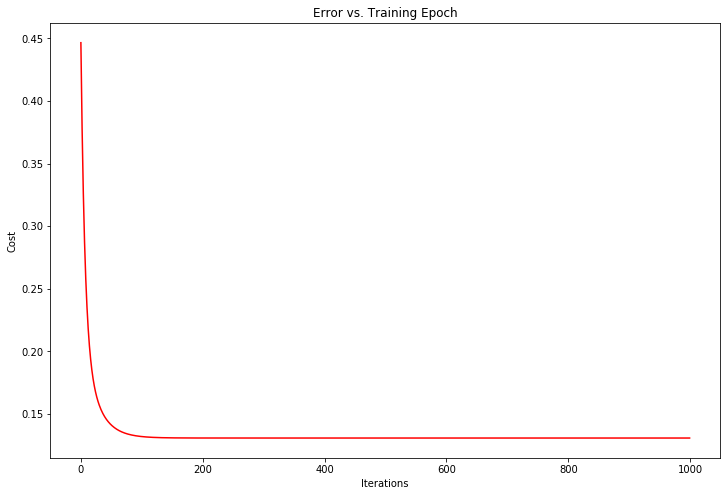

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 结论

我们现在看到，我们使用梯度下降实现了一个多元线性回归问题型。分别采用批量梯度下降和小批量梯度下降方法来进行求解。

## 练习

1. 尝试用不同的学习率查看误差下降速度（收敛率）

2. 网上下载Adrew Ng 机器学习课程中的房价预测数据，进行多元线性回归和多项式回归，对特征进行特征缩放。

## 更多学习
学习其它求解算法，比如正规方程。以及其它优化算法：
* 基于Momentum的梯度下降
* NAG
* Adagrad
* RMSprop
* Adam

## 阶段性作业
* 题目
    * 题目一：设计爬虫，爬去房价或股价等商品数据，利用回归进行学习与预测
    * 题目二：网上下载一些公开的数据集，进行回归分析

* 要求：
    * 任选题目一或题目二完成
    * 利用jupyter来实现，将实验过程一步步写好。或者用其它开发工具实现，ppt介绍你的思路和结果。
    * 介绍时间3-5分钟
    * deadline:2019-10-10
    * 提交内容：代码、数据、ppt等压缩好（取名：学号_姓名）发送至liangliang@suibe.edu.cn